# 1. Import Libraries

- Pandas for data manipulation

- Matplotlib for basic visualization

- Maybe Seaborn for improved and interactive visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import style
import matplotlib.cm as cm, matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

%matplotlib inline

# 2. Import the Data Set

- Data Set for july and NJ Transit

In [2]:
df = pd.read_csv('../input/2018_03.csv')
for i in range(4,10):
    df = df.append(pd.read_csv('../input/2018_0'+str(i)+'.csv'))
df = df[df['type'] == 'NJ Transit']

In [3]:
df_july = pd.read_csv('../input/2018_07.csv', index_col = False)
df_july = df_july[df_july['type'] == 'NJ Transit']

- Check for missing values.

In [4]:
df.isnull().sum()

date                  0
train_id              0
stop_sequence     21725
from                  0
from_id             886
to                    0
to_id               886
scheduled_time    21725
actual_time           0
delay_minutes     21725
status                0
line                  0
type                  0
dtype: int64

- drop these missing values.

In [5]:
df = df.dropna()
df_july = df_july.dropna()

- Show descriptive statistics

In [6]:
df_july.describe()

,stop_sequence,from_id,to_id,delay_minutes
count,244850.000000,244850.000000,244850.000000,244850.000000
mean,7.969688,4283.814613,4295.140702,3.990144
std,5.069360,11876.128556,11887.960028,5.621985
min,1.000000,1.000000,1.000000,0.000000
25%,4.000000,57.000000,57.000000,1.066667
50%,7.000000,103.000000,103.000000,2.333333
75%,11.000000,136.000000,136.000000,5.100000
max,26.000000,43599.000000,43599.000000,99.000000


# 3. Converting the "scheduled_time" and "actual_time" columns to datetimes

In [7]:
df['scheduled_time'] = pd.to_datetime(df['scheduled_time']) 
df['actual_time'] = pd.to_datetime(df['actual_time'])
df_july.head(2)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-07-01,0724,1.0,Gladstone,49.0,Gladstone,49.0,2018-07-01 12:52:00,2018-07-01 12:52:05,0.083333,departed,Gladstone Branch,NJ Transit
1,2018-07-01,0724,2.0,Gladstone,49.0,Peapack,117.0,2018-07-01 12:55:00,2018-07-01 12:56:09,1.150000,departed,Gladstone Branch,NJ Transit


In [8]:
df_july['scheduled_time'] = pd.to_datetime(df_july['scheduled_time']) 
df_july['actual_time'] = pd.to_datetime(df_july['actual_time'])
df_july.head(2)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-07-01,0724,1.0,Gladstone,49.0,Gladstone,49.0,2018-07-01 12:52:00,2018-07-01 12:52:05,0.083333,departed,Gladstone Branch,NJ Transit
1,2018-07-01,0724,2.0,Gladstone,49.0,Peapack,117.0,2018-07-01 12:55:00,2018-07-01 12:56:09,1.150000,departed,Gladstone Branch,NJ Transit


# 4. Picking July for More Analysis

In [9]:
#The cumulative delay for a train is simply the "delay" value for the last stop for the train:
cumu_delay_july = df_july.groupby(['date' , 'train_id']).last()
cumu_delay_july .head(2)

stop_sequence     ...            type
date       train_id                    ...                
2018-07-01 0041               25.0     ...      NJ Transit
           0070               26.0     ...      NJ Transit

[2 rows x 11 columns]

In [10]:
#july
ontime_trains_july = cumu_delay_july[(cumu_delay_july['delay_minutes']<=0)]
ontime_trains_count_july = ontime_trains_july['delay_minutes'].count()

cancelled_trains = df_july[(df_july['status'] == 'cancelled')]
cancelled_trains_count = cancelled_trains['train_id'].count()

delayed_trains_july = cumu_delay_july[(cumu_delay_july['delay_minutes']>0)]
delayed_trains_count_july = delayed_trains_july['delay_minutes'].count()

In [11]:
# function to produce more beautiful pie charts with matplotlib
def pie_chart(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = lambda x: str(round(x, 1)) + '%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what to label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'


        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

       
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title)
    plt.show()

- It shows that summer is the season having more delay in compare of others

In [12]:
df_march = pd.read_csv('../input/2018_03.csv', index_col = False)
df_march = df_march[df_march['type'] == 'NJ Transit']
df_march = df_march.dropna()

df_april = pd.read_csv('../input/2018_04.csv', index_col = False)
df_april = df_april[df_april['type'] == 'NJ Transit']
df_april = df_april.dropna()

df_may = pd.read_csv('../input/2018_05.csv', index_col = False)
df_may = df_may[df_may['type'] == 'NJ Transit']
df_may = df_may.dropna()

df_june = pd.read_csv('../input/2018_06.csv', index_col = False)
df_june = df_june[df_june['type'] == 'NJ Transit']
df_june = df_june.dropna()

df_august = pd.read_csv('../input/2018_08.csv', index_col = False)
df_august = df_august[df_august['type'] == 'NJ Transit']
df_august = df_august.dropna()

df_september = pd.read_csv('../input/2018_09.csv', index_col = False)
df_september = df_september[df_september['type'] == 'NJ Transit']
df_september = df_september.dropna()


In [13]:
cumu_delay_march = df_march.groupby(['date' , 'train_id']).last()
cumu_delay_april = df_april.groupby(['date' , 'train_id']).last()
cumu_delay_may = df_may.groupby(['date' , 'train_id']).last()
cumu_delay_june = df_june.groupby(['date' , 'train_id']).last()
cumu_delay_august = df_august.groupby(['date' , 'train_id']).last()
cumu_delay_september = df_september.groupby(['date' , 'train_id']).last()

In [14]:
delayed_trains_march = cumu_delay_march[(cumu_delay_march['delay_minutes']>0)]
delayed_trains_count_march = delayed_trains_march['delay_minutes'].count()

delayed_trains_april = cumu_delay_april[(cumu_delay_april['delay_minutes']>0)]
delayed_trains_count_april = delayed_trains_april['delay_minutes'].count()

delayed_trains_may = cumu_delay_may[(cumu_delay_may['delay_minutes']>0)]
delayed_trains_count_may = delayed_trains_may['delay_minutes'].count()

delayed_trains_june = cumu_delay_june[(cumu_delay_june['delay_minutes']>0)]
delayed_trains_count_june = delayed_trains_june['delay_minutes'].count()

delayed_trains_august = cumu_delay_august[(cumu_delay_august['delay_minutes']>0)]
delayed_trains_count_august = delayed_trains_august['delay_minutes'].count()

delayed_trains_september = cumu_delay_september[(cumu_delay_september['delay_minutes']>0)]
delayed_trains_count_september = delayed_trains_september['delay_minutes'].count()

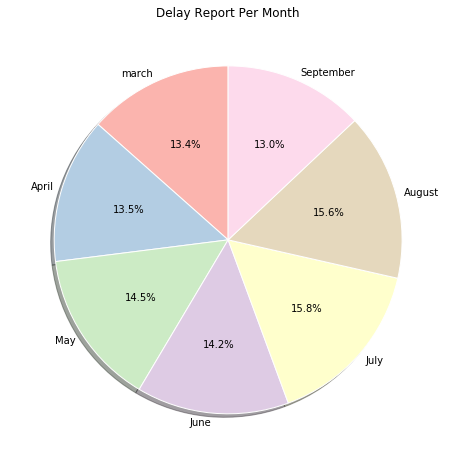

In [15]:
delay_data_per_month = [ delayed_trains_count_march , delayed_trains_count_april ,delayed_trains_count_may, delayed_trains_count_june ,delayed_trains_count_july, delayed_trains_count_august , delayed_trains_count_september]
labels = 'march', 'April' , 'May' , 'June' , 'July' , 'August' , 'September'
# test out our function
pie_chart(fractions = delay_data_per_month,
          labels = labels,
          title = 'Delay Report Per Month')

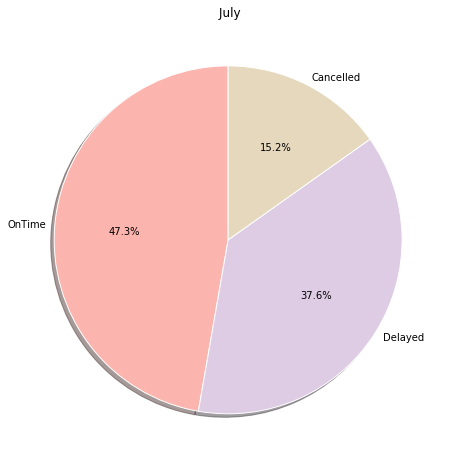

In [16]:
#july
delay_data = [ontime_trains_count_july, delayed_trains_count_july , cancelled_trains_count]
labels = 'OnTime', 'Delayed' , 'Cancelled'
# test out our function
pie_chart(fractions = delay_data,
          labels = labels,
          title = ' July')

# 5. Status of the Trains in july 

In [17]:
departed = df_july[df_july['status'] == 'departed'].status.count()
estimated = df_july[df_july['status'] == 'estimated'].status.count()
cancelled = df_july[df_july['status'] == 'cancelled'].status.count()
sum_status = departed+estimated+cancelled
statuses = df_july['status'].value_counts()/sum_status
statuses

departed     0.899281
estimated    0.086322
cancelled    0.014397
Name: status, dtype: float64

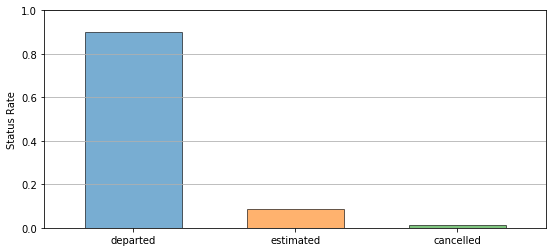

In [18]:
ax = statuses.plot(kind='bar', figsize=[9,4],width=0.6,alpha=0.6,edgecolor='k', grid=False, ylim=[0, 1])

ax.set_xticklabels(statuses.index, rotation=0, rotation_mode='anchor')
ax.yaxis.grid(True)
ax.yaxis.grid(True)
   
ax.set_ylabel('Status Rate')

plt.show()

# 6. Probability Density Function (PDF) for Delay

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


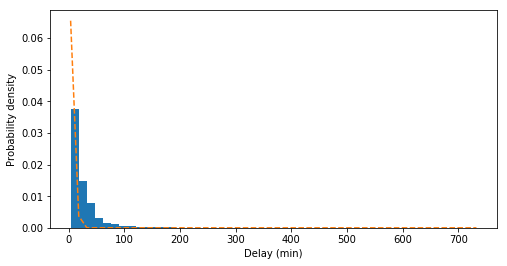

In [19]:
mu = df['delay_minutes'].mean() # mean of distribution
sigma = df['delay_minutes'].std()  # standard deviation of distribution
x = (df['delay_minutes'] *sigma ) + mu 

num_bins = 50

fig, ax = plt.subplots(figsize=(8, 4))

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')


ax.set_xlabel('Delay (min)')
ax.set_ylabel('Probability density')
ax.set_title('')

plt.show()

# 7. Average Delay During a Week

In [27]:
week_av_delay = df.groupby(df['day_of_weeks'] ,as_index = False )['delay_minutes'].mean()
week_av_delay['num'] = [5,1,6,7,4,2,3]

In [28]:
week_av_delay = df.groupby(df['day_of_weeks'] ,as_index = False )['delay_minutes'].mean()
week_av_delay['num'] = [5,1,6,7,4,2,3]
week_av_delay

,day_of_weeks,delay_minutes,num
0,Friday,4.161749,5
1,Monday,3.522522,1
2,Saturday,4.304507,6
3,Sunday,3.818287,7
4,Thursday,3.522730,4
5,Tuesday,3.638749,2
6,Wednesday,3.572837,3


In [24]:
df_july['date'] = pd.to_datetime(df_july['date']) 
df_july['day_of_weeks'] = df_july['date'].dt.weekday_name
df['date'] = pd.to_datetime(df['date']) 
df['day_of_weeks'] = df['date'].dt.weekday_name

In [29]:
week_av_delay_july = df_july.groupby(df_july['day_of_weeks'] ,as_index = False )['delay_minutes'].mean()
week_av_delay_july['num'] = [5,1,6,7,4,2,3]

In [30]:
week_av_delay_july = df_july.groupby(df_july['day_of_weeks'] ,as_index = False )['delay_minutes'].mean()
week_av_delay_july['num'] = [5,1,6,7,4,2,3]
week_av_delay_july

,day_of_weeks,delay_minutes,num
0,Friday,4.286390,5
1,Monday,3.904886,1
2,Saturday,4.416917,6
3,Sunday,3.935569,7
4,Thursday,3.853992,4
5,Tuesday,4.076555,2
6,Wednesday,3.581229,3


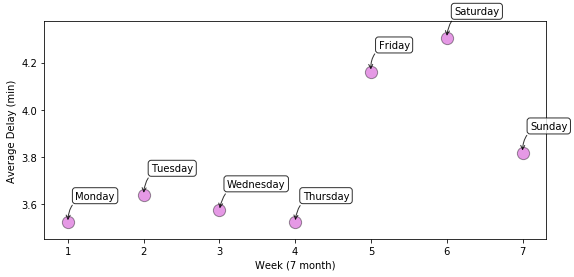

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 4)
week_av_delay_scatter = ax.scatter(x = week_av_delay['num'], y = week_av_delay['delay_minutes'],
                                   c='m', edgecolor='k', alpha=.4, s=150)


# set  axis labels

ax.set_xlabel('Week (7 month)')
ax.set_ylabel('Average Delay (min)')

# annotate
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_day_of_weeks= lambda row: ax.annotate(row['day_of_weeks'], 
                                          xy=(row['num'], row['delay_minutes']),
                                          xytext=(row['num'] + 0.1, row['delay_minutes'] + 0.1),
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
week_av_delay.apply(annotate_day_of_weeks, axis=1)
    
plt.show()

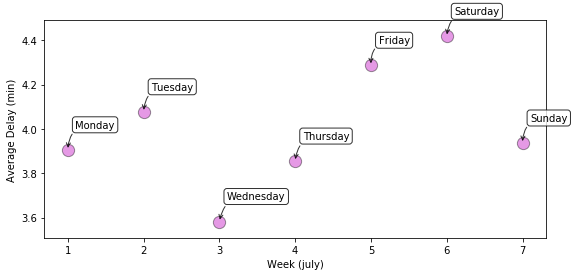

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 4)
week_av_delay_july_scatter = ax.scatter(x = week_av_delay_july['num'], y = week_av_delay_july['delay_minutes'], c='m', edgecolor='k', alpha=.4, s=150)


# set  axis labels

ax.set_xlabel('Week (july)')
ax.set_ylabel('Average Delay (min)')

# annotate
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_day_of_weeks_july = lambda row: ax.annotate(row['day_of_weeks'], 
                                          xy=(row['num'], row['delay_minutes']),
                                          xytext=(row['num'] + 0.1, row['delay_minutes'] + 0.1),
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
week_av_delay_july.apply(annotate_day_of_weeks_july, axis=1)
    

plt.show()

# 8. Delay in Different Scheduled Times

In [ ]:
df_july['ac_time']= df_july['actual_time'].dt.time
df_july['sc_time']= df_july['scheduled_time'].dt.time

In [ ]:

x = df_july.groupby('sc_time')['delay_minutes'].mean()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(9,4)



fig.autofmt_xdate()

ax.plot(x , color = 'c' , alpha=0.5)
ax.set_xlim('00:00:00', '06:00:00')

ax.set_xlabel('Scheduled Time (00:00_06:00)')
ax.set_ylabel('Average Delay (min)')


fig.suptitle('Early Morning ')

plt.show()

- The highest amount of Delay occures between mid-night and 6 am

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(9,4)



fig.autofmt_xdate()

ax.plot(x , color = 'c' , alpha=0.5)
ax.set_xlim('06:00:00', '12:00:00')

ax.set_xlabel('Scheduled Time (06:00_12:00)')
ax.set_ylabel('Average Delay (min)')



fig.suptitle('Early Afternoon')

plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(9,4)


fig.autofmt_xdate()

ax.plot(x , color = 'c' , alpha=0.5)
ax.set_xlim('12:00:00', '18:00:00')

ax.set_xlabel('Scheduled Time (12:00_18:00)')
ax.set_ylabel('Average Delay (min)')

fig.suptitle('Late Afternoon ')

plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(9,4)


fig.autofmt_xdate()

ax.plot(x , color = 'c' , alpha=0.5)
ax.set_xlim('18:00:00', '23:59:00')

ax.set_xlabel('Scheduled Time (18:00_00:00)')
ax.set_ylabel('Average Delay (min)')



fig.suptitle('Evening')

plt.show()

- and  we have many peaks in the evening also

#  9. Most Delayed Lines in july

- Numbers of Trips have a Direct Relationship with Delay

In [ ]:
lines = df_july.groupby(['train_id']).last()
lines.head(2)

In [ ]:
line_usage = lines['line'].value_counts()
line_usage

In [ ]:
lines_cumu_delay_july = lines.groupby('line')['delay_minutes'].sum().sort_values(ascending=False)
lines_cumu_delay_july

In [ ]:
lines_stop_sequence = lines.groupby('line')['stop_sequence'].sum().sort_values(ascending=False)
lines_stop_sequence

In [ ]:
bar_width = 0.25
error_config = {'ecolor': '0.3'}

ax = line_usage.plot(kind = 'bar', figsize=[9, 4], width = bar_width, position=1 , alpha=0.6, 
                    color='g', edgecolor='k', grid=False, ylim=[0, 225] , error_kw = error_config,
                 label='Number of Trips')

ax.set_xticklabels(line_usage.index, rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
   


ax.set_ylabel('Number of Train records for Each Line',  color='g')
ax.tick_params('y', colors='g')



ax2 = ax.twinx()

ax2 =lines_cumu_delay_july.plot( kind = 'bar' , figsize=[9, 4], width= bar_width, position = 0, alpha=0.6, 
                    color='r', edgecolor='k', grid=False, ylim=[0, 700] , error_kw=error_config,
                 label='Delay (min)')

ax2.set_xticklabels(lines_cumu_delay_july.index, rotation=45, rotation_mode='anchor', ha='right')



ax2.set_ylabel('Delay (min)' , color='r')
ax2.tick_params('y', colors='r')






- Numbers of Stops have a Direct Relationship with Delay

In [ ]:

ax = lines_stop_sequence.plot(kind='bar', figsize=[9, 9], width= bar_width, alpha=0.6, position = 1,
                    color='b', edgecolor='k', grid=False, ylim=[0, 5000])

ax.set_xticklabels(lines_stop_sequence.index, rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
   
ax.set_ylabel('Number of Stops' , color='y')
ax.tick_params('y', colors='y')

ax2 = ax.twinx()

ax2 =lines_cumu_delay_july.plot( kind = 'bar' , figsize=[9, 4], width= bar_width, position = 0, alpha=0.6, 
                    color='r', edgecolor='k', grid=False, ylim=[0, 700] , error_kw=error_config,
                 label='Delay (min)')

ax2.set_xticklabels(lines_cumu_delay_july.index, rotation=45, rotation_mode='anchor', ha='right')



ax2.set_ylabel('Delay (min)' , color='r')
ax2.tick_params('y', colors='r')

# 10. Number of Stops vs. Delay for "No Jersey Coast" Line

In [ ]:
df_july_NJC = df_july[df_july['line'] == 'No Jersey Coast']
x= df_july_NJC.groupby('stop_sequence')["delay_minutes"].mean()

fig, ax = plt.subplots()
fig.set_size_inches(9,4)

ax.plot(x , color = 'c' , alpha=0.5 , linewidth='3')


ax.set_ylabel("average delay (min)")
ax.set_xlabel("Stops")

plt.show()

# 11. Most Delayed Stations in july

In [ ]:
stations = df_july.groupby(['train_id']).last()
stations.head(2)

In [ ]:
stations_to_usage = stations['to'].value_counts().head(10)
stations_to_usage

In [ ]:
stations_to_cumu_delay_july = stations.groupby('to')['delay_minutes'].sum().sort_values(ascending=False).head(10)
stations_to_cumu_delay_july

In [ ]:
stations_stop_sequence = stations.groupby('to')['stop_sequence'].sum().sort_values(ascending=False).head(10)
stations_stop_sequence

In [ ]:
ax = stations_to_usage.plot(kind='bar', figsize=[9, 9], width= bar_width, alpha=0.6, position = 1,
                    color='orange', edgecolor='k', grid=False, ylim=[0, 300])

ax.set_xticklabels(stations_to_usage.index, rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
   
ax.set_ylabel('Number of Trains ' , color='orange')
ax.tick_params('y', colors='orange')

ax2 = ax.twinx()

ax2 =stations_to_cumu_delay_july.plot( kind = 'bar' , figsize=[9, 4], width= bar_width, position = 0, alpha=0.6, 
                    color='r', edgecolor='k', grid=False, ylim=[0, 900] , error_kw=error_config,
                 label='Delay(min)')

ax2.set_xticklabels(stations_to_cumu_delay_july.index, rotation=45, rotation_mode='anchor', ha='right')



ax2.set_ylabel('Delay(min)' , color='r')
ax2.tick_params('y', colors='r')

- Number of TRIPS has a Direct Relationship with Delay the same as lines

In [ ]:
ax = stations_stop_sequence.plot(kind='bar', figsize=[9, 9], width= bar_width, alpha=0.6, position = 1,
                    color='slategrey', edgecolor='k', grid=False, ylim=[0, 4000])

ax.set_xticklabels(stations_stop_sequence.index, rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
   
ax.set_ylabel('Number of Stops' , color='slategrey')
ax.tick_params('y', colors='slategrey')

ax2 = ax.twinx()

ax2 =stations_to_cumu_delay_july.plot( kind = 'bar' , figsize=[9, 4], width= bar_width, position = 0, alpha=0.6, 
                    color='r', edgecolor='k', grid=False, ylim=[0, 900] , error_kw=error_config,
                 label='Delay(min)')

ax2.set_xticklabels(stations_to_cumu_delay_july.index, rotation=45, rotation_mode='anchor', ha='right')



ax2.set_ylabel('Delay(min)' , color='r')
ax2.tick_params('y', colors='r')

- Number of STOPS has a Direct Relationship with Delay the same as lines

# 12. Delays of ''New York Penn" Station During the 2nd of july

In [ ]:
#get cumulative delay for NJ Transit trains to New York Penn line
njt_nyp = cumu_delay_july[cumu_delay_july['to'] == 'New York Penn Station']
njt_nyp.head(2)

In [ ]:
#delays for all NJ Transit trains to New York Penn line on july 2, 2018
# filter based on the "date" index, which level 0 of the multiindex
njt_nyp_0702 = njt_nyp.loc[njt_nyp.index.get_level_values(0) == '2018-07-02']
njt_nyp_0702.head(2)

In [ ]:
x = njt_nyp_0702.groupby('scheduled_time')['delay_minutes'].mean()

fig, ax = plt.subplots()
fig.set_size_inches(9,4)
fig.autofmt_xdate()

ax.plot(x , color = 'c' , alpha=0.5 , linewidth='3')


ax.set_xlabel('scheduled Time')
ax.set_ylabel('Delay (min)')

plt.show()